Dataset Source : https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sarthaksinghgaur/End-to-End-ML-Project-on-Microsoft-Azure-Cloud/notebook/data/card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.shape

(1000000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

distance_from_home                1000000
distance_from_last_transaction    1000000
ratio_to_median_purchase_price    1000000
repeat_retailer                         2
used_chip                               2
used_pin_number                         2
online_order                            2
fraud                                   2
dtype: int64

In [10]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
for i in df.columns:
    print('for {} the unique values are :'.format(i))
    print(df[i].unique(),'\n')

for distance_from_home the unique values are :
[57.87785658 10.8299427   5.09107949 ...  2.91485699  4.25872939
 58.10812496] 

for distance_from_last_transaction the unique values are :
[0.31114001 0.1755915  0.80515259 ... 1.47268669 0.24202337 0.31811012] 

for ratio_to_median_purchase_price the unique values are :
[1.94593998 1.29421881 0.42771456 ... 0.21807549 0.47582206 0.38691985] 

for repeat_retailer the unique values are :
[1. 0.] 

for used_chip the unique values are :
[1. 0.] 

for used_pin_number the unique values are :
[0. 1.] 

for online_order the unique values are :
[0. 1.] 

for fraud the unique values are :
[0. 1.] 



<Axes: title={'center': 'Fraud Class Distribution'}, xlabel='fraud'>

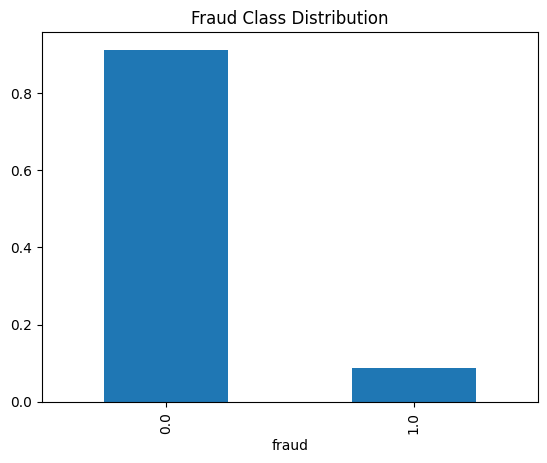

In [17]:
df['fraud'].value_counts(normalize=True).plot(kind='bar', title='Fraud Class Distribution')

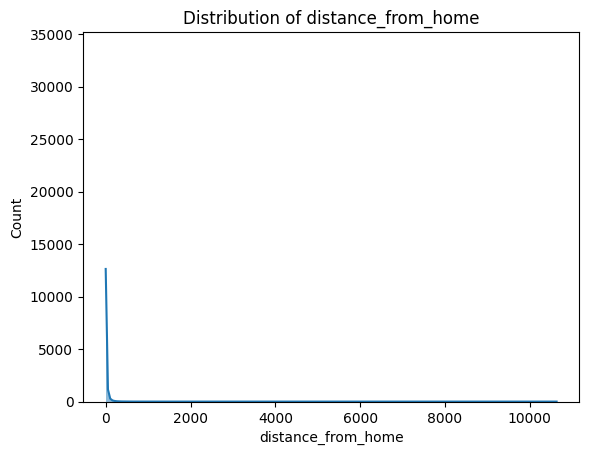

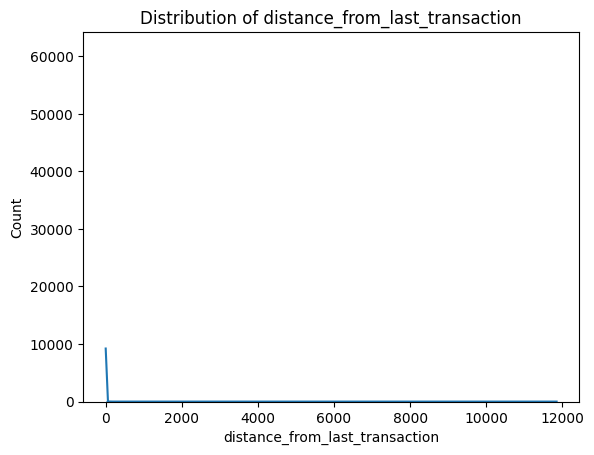

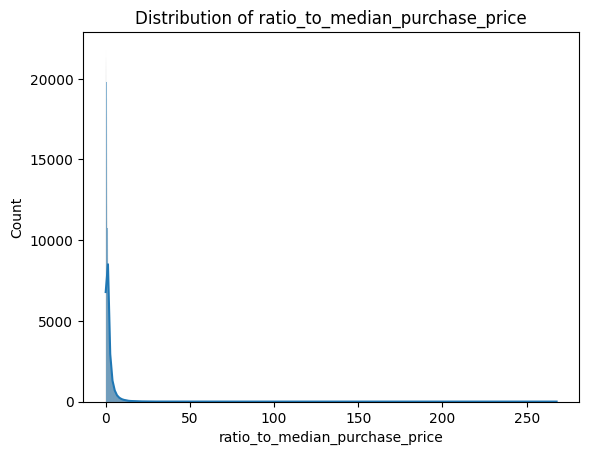

In [18]:
num_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

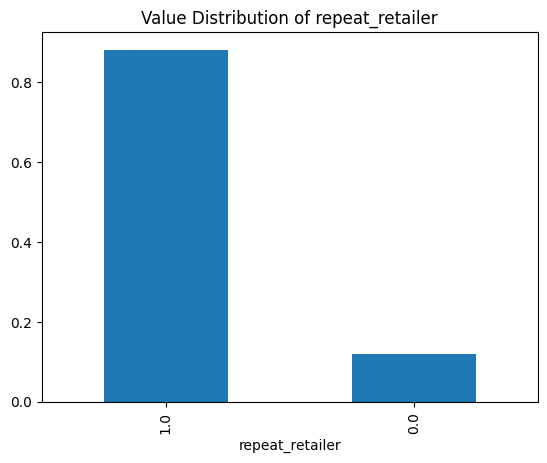

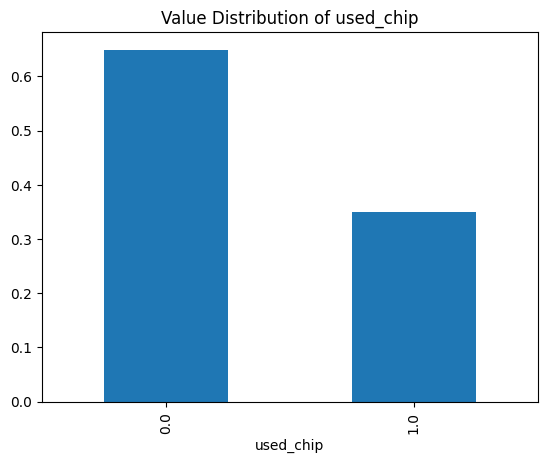

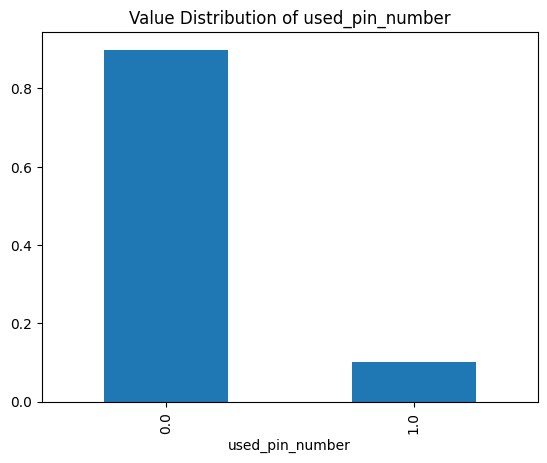

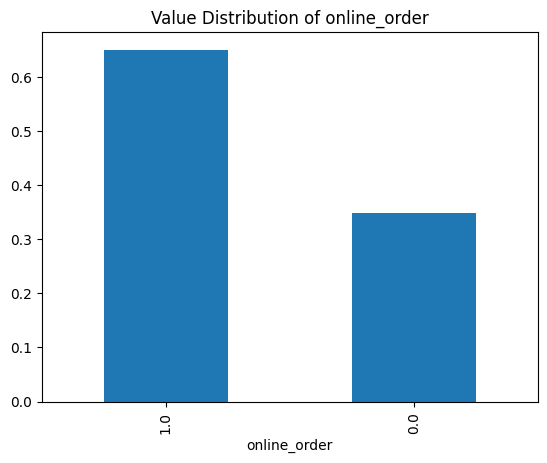

In [19]:
cat_cols = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
for col in cat_cols:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Value Distribution of {col}')
    plt.show()

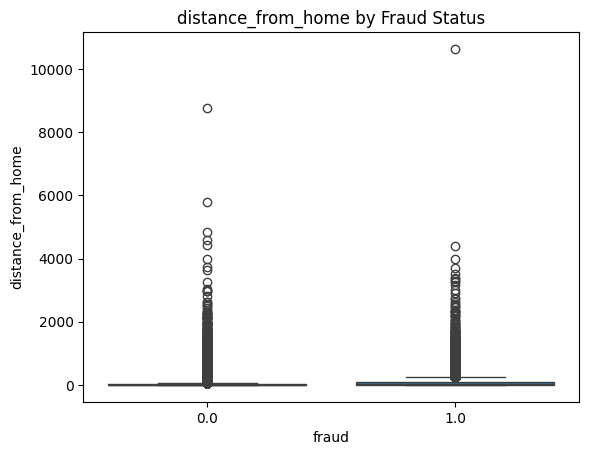

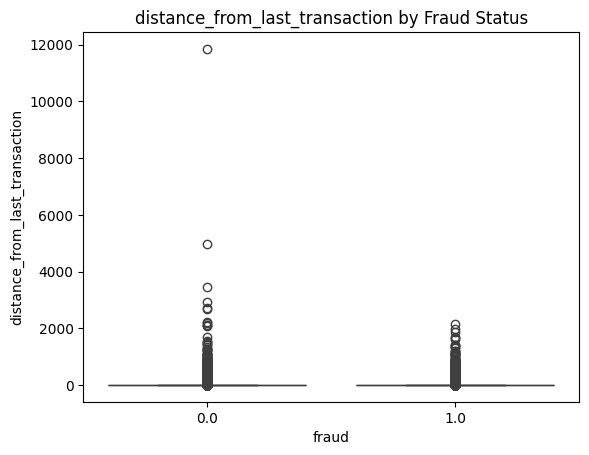

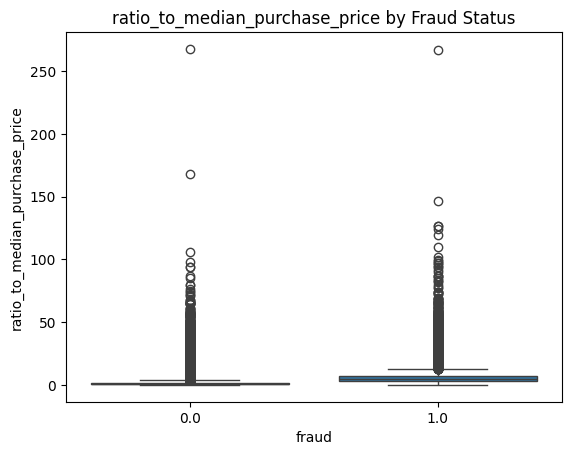

In [20]:
for col in num_cols:
    sns.boxplot(x='fraud', y=col, data=df)
    plt.title(f'{col} by Fraud Status')
    plt.show()

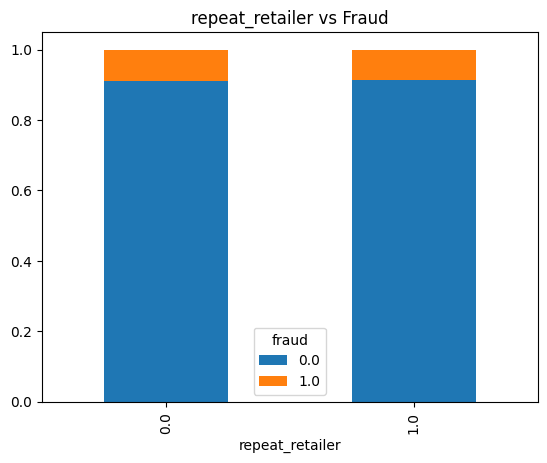

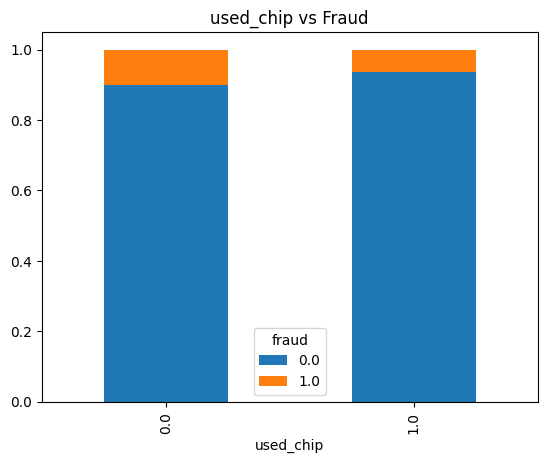

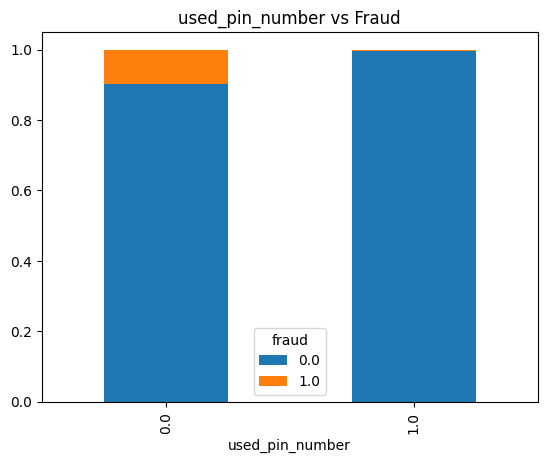

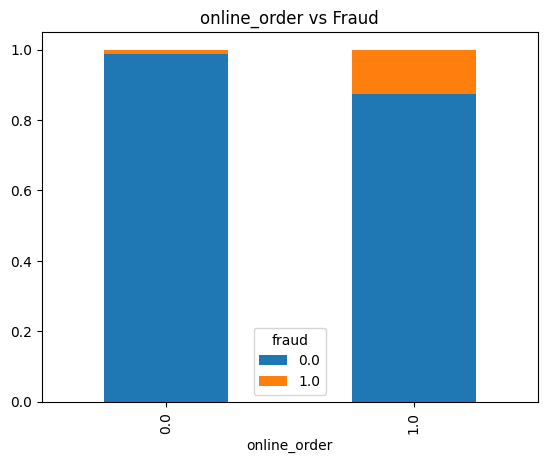

In [21]:
for col in cat_cols:
    pd.crosstab(df[col], df['fraud'], normalize='index').plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Fraud')
    plt.show()

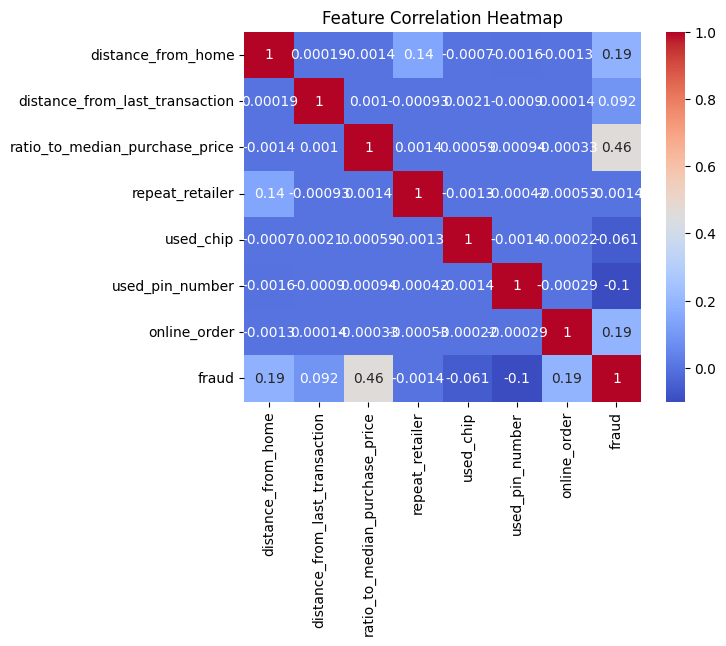

In [22]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()